In [2]:
import pandas as pd

In [4]:
opers = pd.read_csv(r'C:\Users\Polina\Downloads\opers.csv', encoding = 'cp1251')
samples = pd.read_csv(r'C:\Users\Polina\Downloads\samples.csv', encoding = 'cp1251')

In [6]:
opers['start'] = pd.to_datetime(opers['start'])
opers['end'] = pd.to_datetime(opers['end'])
samples['datetime'] = pd.to_datetime(samples['datetime'])

In [8]:
df_rt_1 = opers[opers['equip'] == 'РТ 760 №1']
df_rt_1 = df_rt_1.dropna()
df_rt_1 = df_rt_1.drop_duplicates()
df_rt_1 = df_rt_1.sort_values('start').reset_index(drop = True)

In [10]:
df_rt_2 = samples[samples['equip'] == 'РТ 760 №2']
df_rt_2 = df_rt_2.dropna()
df_rt_2 = df_rt_2.drop_duplicates()
df_rt_2 = df_rt_2.sort_values('datetime').reset_index(drop = True)

In [12]:
df_rt_1['duration'] = df_rt_1['end'] - df_rt_1['start']

In [14]:
df_rt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   equip     987 non-null    object         
 1   start     987 non-null    datetime64[ns] 
 2   end       987 non-null    datetime64[ns] 
 3   qty       987 non-null    float64        
 4   duration  987 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(1), timedelta64[ns](1)
memory usage: 38.7+ KB


In [16]:
df_rt_1 = df_rt_1[df_rt_1['duration'] > pd.Timedelta(seconds = 0)]
df_rt_1 = df_rt_1.reset_index(drop = True)
df_rt_1['duration'].describe()

count                          940
mean     0 days 06:02:15.213172573
std      0 days 00:35:01.747656026
min         0 days 05:00:03.793489
25%         0 days 05:31:26.774559
50%         0 days 06:04:33.721060
75%      0 days 06:31:32.864936500
max         0 days 06:59:57.841803
Name: duration, dtype: object

In [18]:
df_rt_2['delta'] = df_rt_2['NaOH'].shift() - df_rt_2['NaOH']

In [20]:
# Создаем новый столбец для хранения суммарного времени ОЦВР в df_rt_2
df_rt_2['duration'] = 0.0

# Рассчитываем время ОЦВР для каждого интервала между пробами
for index in range(1, len(df_rt_2)):
    # Временной интервал между предыдущей и текущей пробами
    start_time = df_rt_2.at[index - 1, 'datetime']
    end_time = df_rt_2.at[index, 'datetime']

    # Фильтруем операции ОЦВР, которые начались в этом интервале
    time_df = df_rt_1[(df_rt_1['start'] > df_rt_2.at[index - 1, 'datetime']) &
                      (df_rt_1['start'] < df_rt_2.at[index, 'datetime'])]

    # Суммируем продолжительность операций и переводим в часы
    total_seconds = time_df['duration'].dt.total_seconds().sum()
    ocvr_time_hours = total_seconds / 3600.0

    # Сохраняем результат в df_rt_2
    df_rt_2.at[index, 'duration'] = ocvr_time_hours

In [22]:
df_rt_2[:3]

,equip,datetime,NaOH,delta,duration
0,РТ 760 №2,2023-01-01 16:00:00,565.530270,NaN,0.000000
1,РТ 760 №2,2023-01-02 16:00:00,409.572045,155.958224,18.712542
2,РТ 760 №2,2023-01-03 16:00:00,267.191749,142.380296,17.086949


In [24]:
df_rt_2.describe()

,datetime,NaOH,delta,duration
count,332,332.000000,331.000000,332.000000
mean,2023-07-03 08:41:55.662650624,268.612268,0.056056,17.039073
min,2023-01-01 16:00:00,0.007821,-600.415915,0.000000
25%,2023-04-04 10:00:00,92.609153,72.648480,12.584740
50%,2023-07-05 04:00:00,264.987851,138.487986,17.409845
75%,2023-10-03 22:00:00,426.277702,151.193256,18.558761
max,2023-12-31 16:00:00,604.982960,454.799191,65.291480
std,NaN,197.042903,276.440818,6.963312


In [26]:
df_rt_2 = df_rt_2[(df_rt_2['delta'] > 0) | (df_rt_2['delta'].isna())].reset_index(drop = True)

In [28]:
df_rt_2.describe()

,datetime,NaOH,delta,duration
count,261,261.000000,260.000000,261.000000
mean,2023-07-03 02:06:53.793103360,194.609016,141.308740,16.758676
min,2023-01-01 16:00:00,0.007821,9.665367,0.000000
25%,2023-04-04 16:00:00,32.886625,112.879893,12.609045
50%,2023-07-05 16:00:00,166.787281,144.634619,17.386722
75%,2023-10-04 16:00:00,311.281937,153.792499,18.423393
max,2023-12-30 16:00:00,565.530270,454.799191,54.582256
std,NaN,152.336954,50.454152,6.221727


In [49]:
df_rt_2.reset_index(drop = True)

,equip,datetime,NaOH,delta,duration
0,РТ 760 №2,2023-01-02 16:00:00,409.572045,155.958224,18.712542
1,РТ 760 №2,2023-01-03 16:00:00,267.191749,142.380296,17.086949
2,РТ 760 №2,2023-01-04 16:00:00,132.798012,134.393737,16.152106
3,РТ 760 №2,2023-01-05 16:00:00,8.271607,124.526406,19.747398
4,РТ 760 №2,2023-01-08 16:00:00,232.268967,151.153153,18.177100
...,...,...,...,...,...
255,РТ 760 №2,2023-12-25 16:00:00,8.271607,106.878053,11.789278
256,РТ 760 №2,2023-12-27 16:00:00,440.680827,103.020755,12.394012
257,РТ 760 №2,2023-12-28 16:00:00,271.943054,168.737773,20.251019
258,РТ 760 №2,2023-12-29 16:00:00,114.801612,157.141442,18.911132


In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [61]:
x = np.array(df_rt_2['duration']).reshape((-1, 1))
y = np.array(df_rt_2['delta'])

In [55]:
model = LinearRegression()

In [63]:
model.fit(x, y)

LinearRegression()

In [65]:
r_sq = model.score(x, y)
print('Коэффициент детерминации:', r_sq)

Коэффициент детерминации: 0.5409271490932048


In [69]:
df_rt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 1 to 260
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   equip     260 non-null    object        
 1   datetime  260 non-null    datetime64[ns]
 2   NaOH      260 non-null    float64       
 3   delta     260 non-null    float64       
 4   duration  260 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 10.3+ KB


In [75]:
df_rt_2.corr(numeric_only = True)

,NaOH,delta,duration
NaOH,1.000000,0.146122,-0.141188
delta,0.146122,1.000000,0.735477
duration,-0.141188,0.735477,1.000000


<Axes: xlabel='duration', ylabel='delta'>

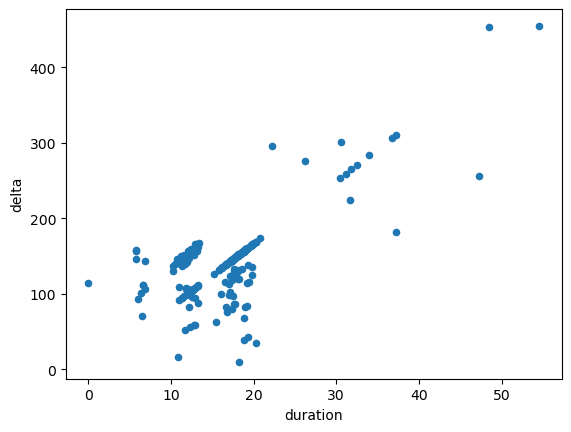

In [77]:
df_rt_2.plot.scatter(x = 'duration', y = 'delta')

In [79]:
print('Свободный коэффициент:', model.intercept_)
print('Коэффициент от длительности', model.coef_)

Свободный коэффициент: 39.7318103442271
Коэффициент от длительности [6.03793203]


In [81]:
print('qty:', df_rt_1['qty'].median())
print('duration:', df_rt_1['duration'].dt.total_seconds().median() / 3600)

qty: 500.1207212559046
duration: 6.076033627777778


In [85]:
def absorber_forecast(NaOH):
    duration = (NaOH - 39.74) / 6.04
    print('Оставшееся время работы абсорбера, ч:', duration)
    print('Примерное количество операций:', int(duration / 6.08))
    print('Примерный обрабатываемый объем, л:', duration / 6.08 * 500.12)